In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df_repair = pd.read_csv('eng_bus_repair.csv')

csv_file = 'unique_feeder_info.csv'
df_sensor = pd.read_csv(csv_file, low_memory=False)

df_repair = df_repair[df_repair['br_busno'].isin(df_sensor['VEH_ID'])]



C:\Users\shake\AppData\Local\Temp\ipykernel_8648\2326068397.py:4: DtypeWarning: Columns (15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_repair = pd.read_csv('eng_bus_repair.csv')


In [2]:
df_repair['br_date_entry'] = pd.to_datetime(df_repair['br_date_entry'])

df_repair['month'] = df_repair['br_date_entry'].dt.month
df_repair['year'] = df_repair['br_date_entry'].dt.year

df_repair = df_repair[df_repair['year'] == 2023]

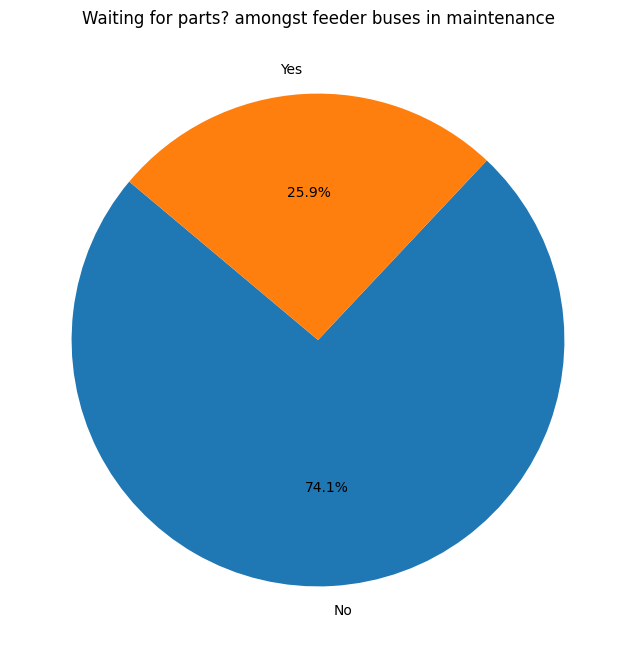

In [3]:
filtered_df_waiting_part = df_repair[df_repair['br_waiting_part'].isin(['Yes', 'No'])]

waiting_part_counts = filtered_df_waiting_part['br_waiting_part'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(waiting_part_counts, labels=waiting_part_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Waiting for parts? amongst feeder buses in maintenance')
plt.show()

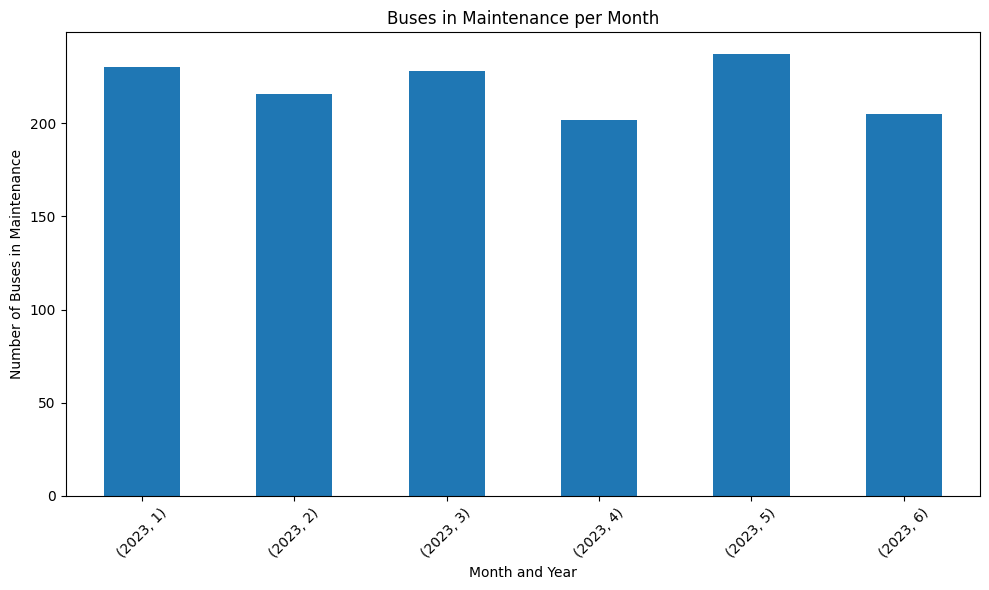

In [4]:
monthly_counts = df_repair.groupby(['year', 'month'])['br_busno'].nunique()

monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month and Year')
plt.ylabel('Number of Buses in Maintenance')
plt.title('Buses in Maintenance per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


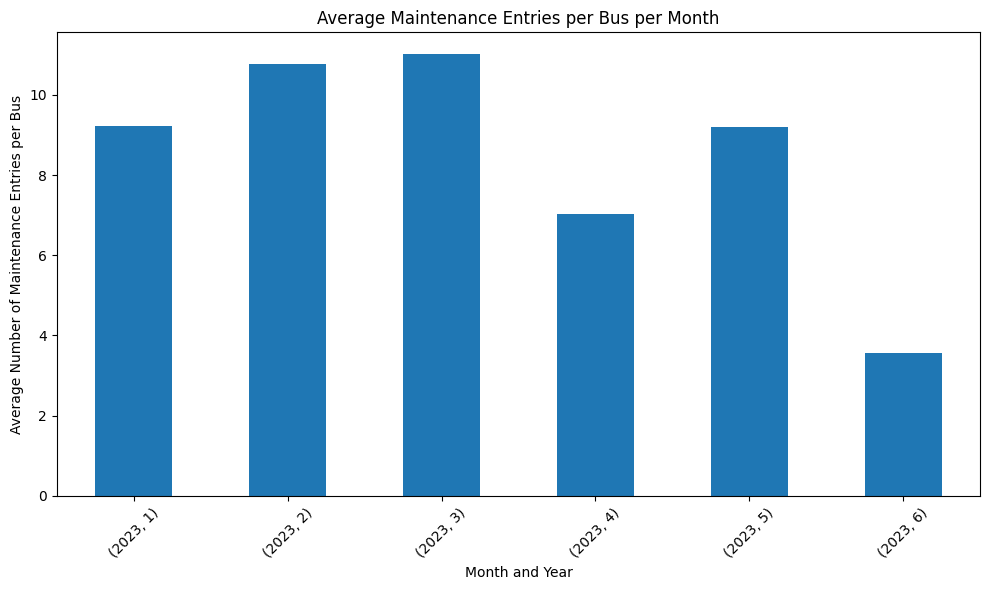

Overall Average Number of Maintenance Entries per Bus per Month: 8.47


In [5]:

monthly_counts = df_repair.groupby(['year', 'month', 'br_busno'])['br_date_entry'].count().reset_index()


average_monthly_counts = monthly_counts.groupby(['year', 'month'])['br_date_entry'].mean()

average_monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month and Year')
plt.ylabel('Average Number of Maintenance Entries per Bus')
plt.title('Average Maintenance Entries per Bus per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


overall_average = average_monthly_counts.mean()


print("Overall Average Number of Maintenance Entries per Bus per Month: {:.2f}".format(overall_average))